# Testing multivariate

## Import libraries

In [109]:
from data_degradation_detector import multivariate as mv
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import numpy as np
importlib.reload(mv)

<module 'data_degradation_detector.multivariate' from 'c:\\Users\\alonm\\Documents\\Programacion\\data-degradation-detector\\data_degradation_detector\\multivariate.py'>

## Import data

In [110]:
df = pd.read_csv("data/basic1.csv")
X = df.drop(columns=['color'], axis=1)
y = df['color']

In [111]:
X

,x,y
0,79.408289,152.834424
1,98.046263,186.910700
2,240.578979,48.473684
3,109.687183,277.945769
4,249.626082,229.753352
...,...,...
9789,271.341817,152.122986
9790,374.928092,424.480854
9791,496.467434,317.553201
9792,484.710737,251.504081


In [112]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9789    1
9790    2
9791    3
9792    3
9793    2
Name: color, Length: 9794, dtype: int64

## Test the module

### Clustering

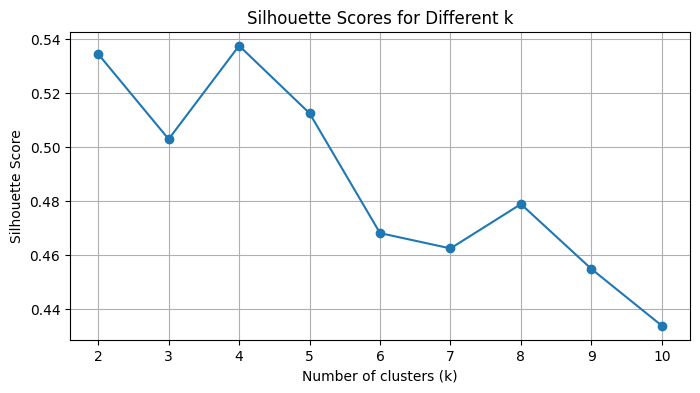

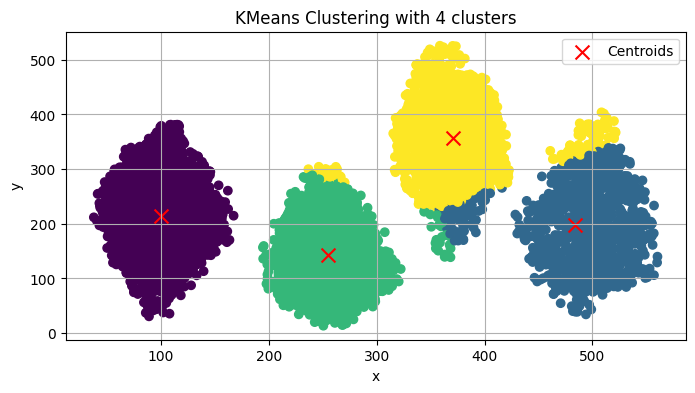

Cluster_statistics(num_clusters=4,
silhouette_score=0.5374,
centroids=[99.8426, 214.3601], [483.9586, 197.3922], [254.8940, 143.0622], [371.1518, 356.2671],
radius=666.1373, 651.4568, 547.8061, 691.8865,
labels_percentages=[38.962630181743926, 12.41576475393098, 26.965489074943843, 21.656115989381252])

In [113]:
mv.get_best_clusters(X)

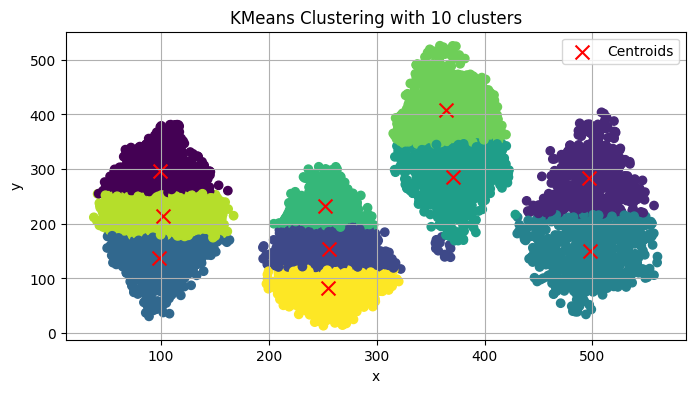

Cluster_statistics(num_clusters=10,
silhouette_score=0.4337,
centroids=[99.4051, 297.4373], [497.2113, 284.6633], [256.1421, 153.0312], [97.8207, 137.6456], [497.8537, 149.4913], [370.9666, 285.2279], [251.6177, 232.6195], [364.2574, 407.4432], [101.3748, 214.8591], [254.4294, 82.2774],
radius=931.9530, 1069.7050, 675.8941, 1015.9631, 1098.8830, 795.3622, 607.8438, 1133.5832, 937.7485, 864.5572,
labels_percentages=[10.16949153  5.15621809 10.55748417 11.20073514  6.84092301 10.68000817
  6.23851338 11.22115581 17.59240351 10.34306718])

In [114]:
mv.get_cluster_defined_number(X, 10)

In [115]:
mid = len(X) // 2
X_train, X_test = X.iloc[:mid], X.iloc[mid:]
y_train, y_test = y.iloc[:mid], y.iloc[mid:]

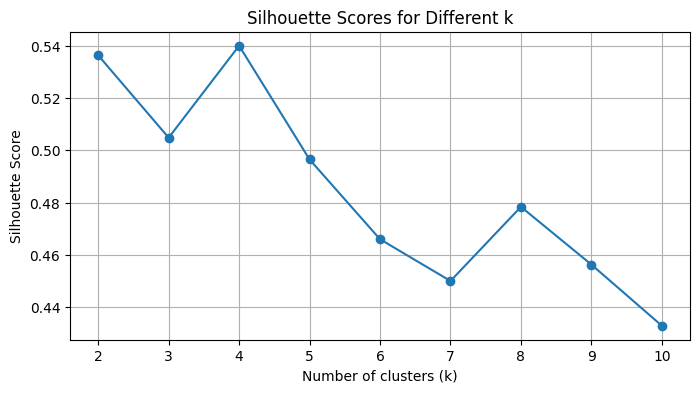

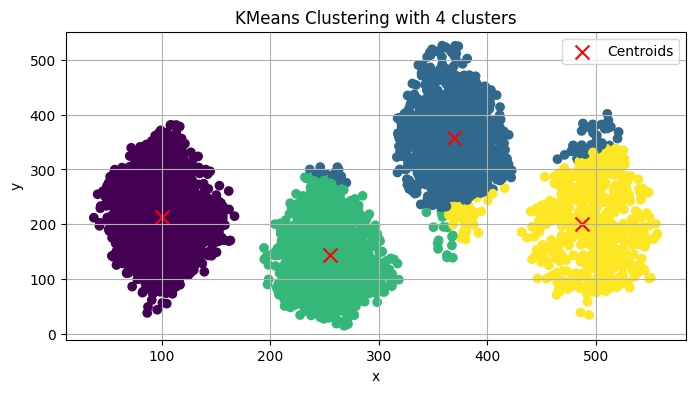

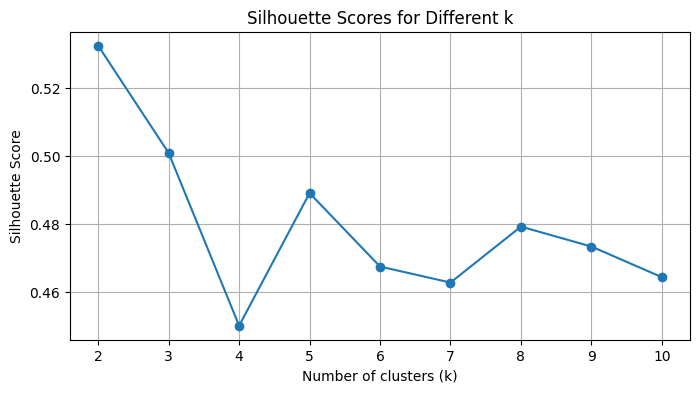

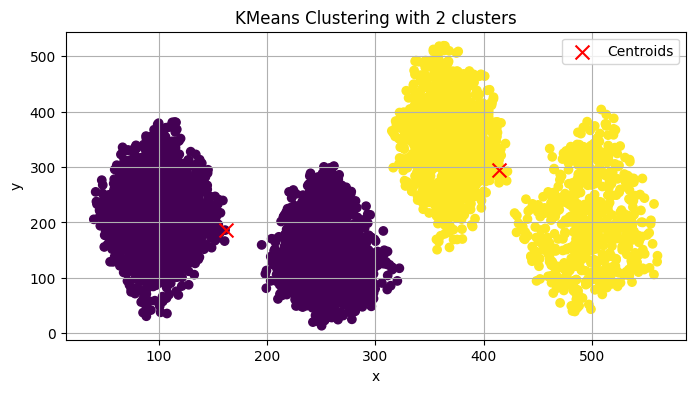

Change: num_clusters: 50.0%, Unchanged: silhouette_score: 14%, delta: 0.1

In [116]:
bc1 = mv.get_best_clusters(X_train)
bc2 = mv.get_best_clusters(X_test)

mv.compare_clusters(bc1, bc2)

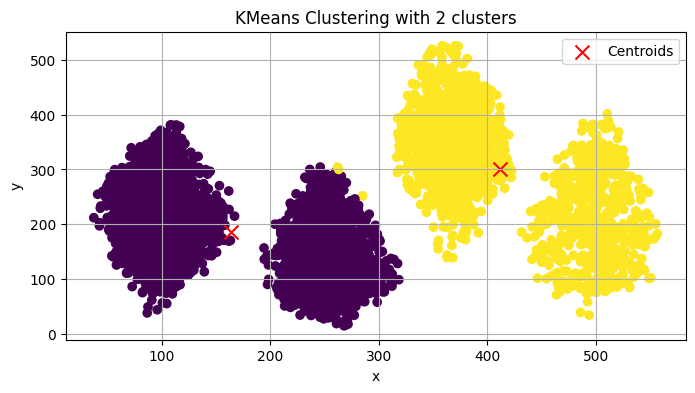

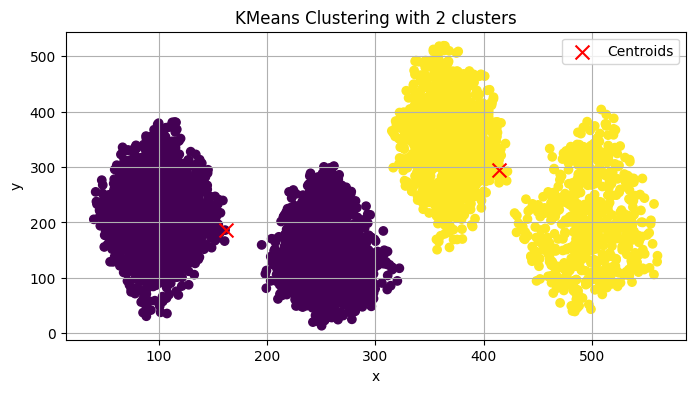

Change: , Unchanged: num_clusters: 0.0%, silhouette_score: 7%, centroid_0: 0%, centroid_1: 3%, radius_0: 7%, radius_1: 6%, label_percentage_0: 13%, label_percentage_1: 25%, delta: 0.1

In [117]:
bc3 = mv.get_cluster_defined_number(X_train, 2)
bc4 = mv.get_cluster_defined_number(X_test, 2)

mv.compare_clusters(bc3, bc4)

c:\Users\alonm\Documents\Programacion\data-degradation-detector\venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


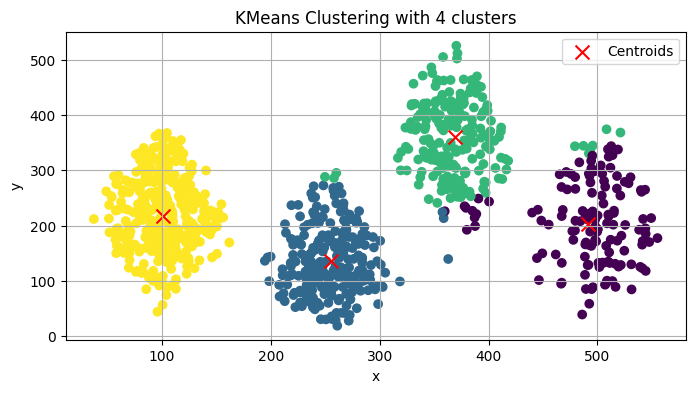

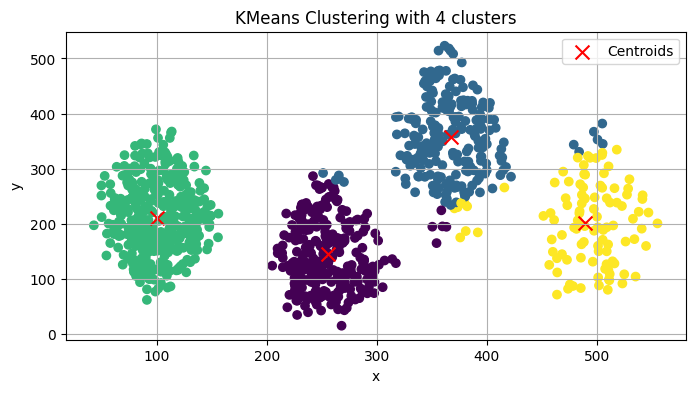

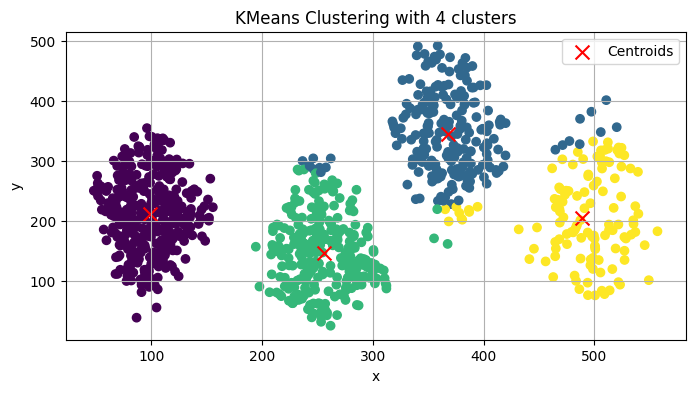

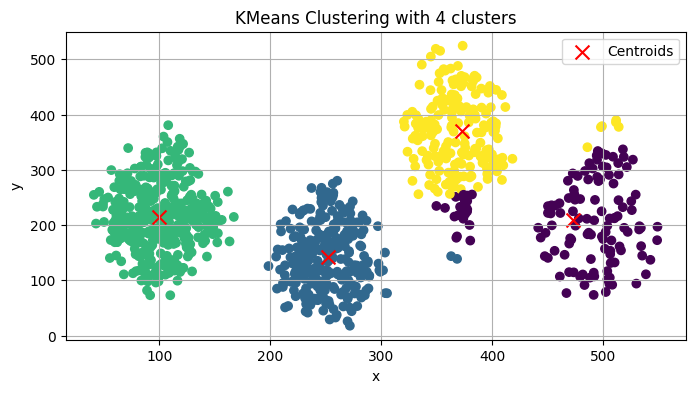

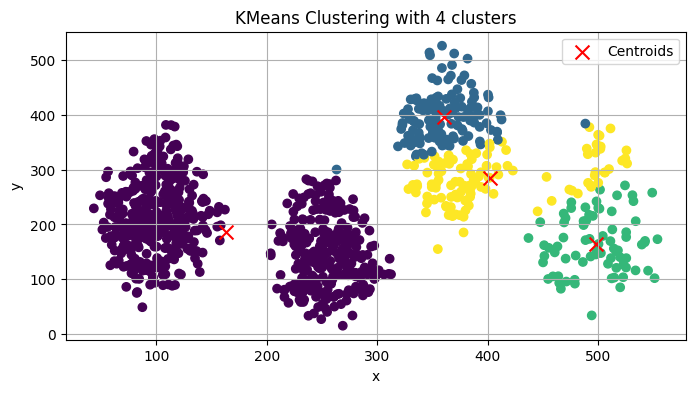

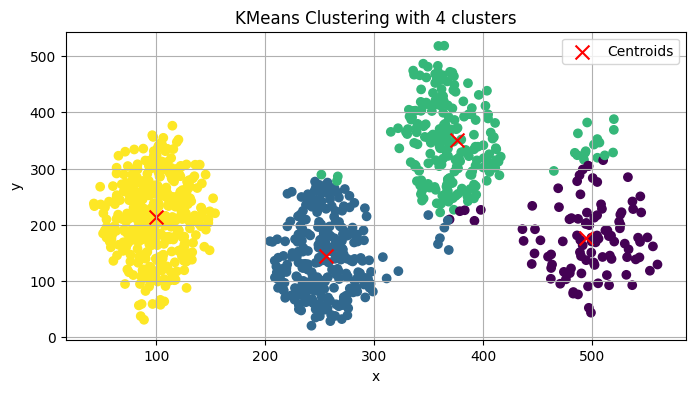

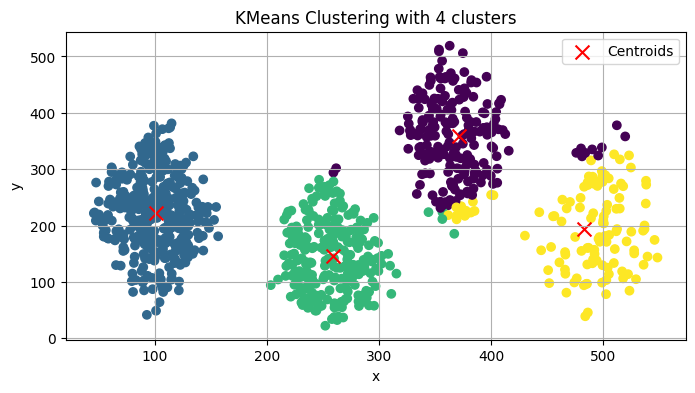

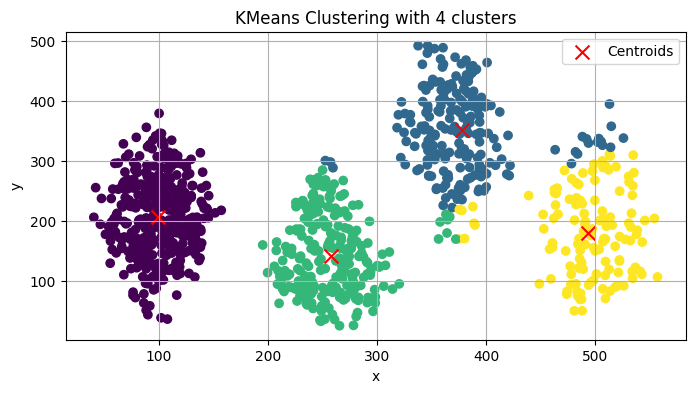

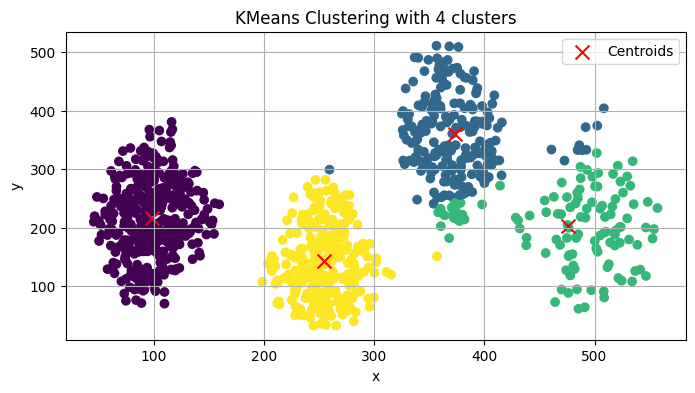

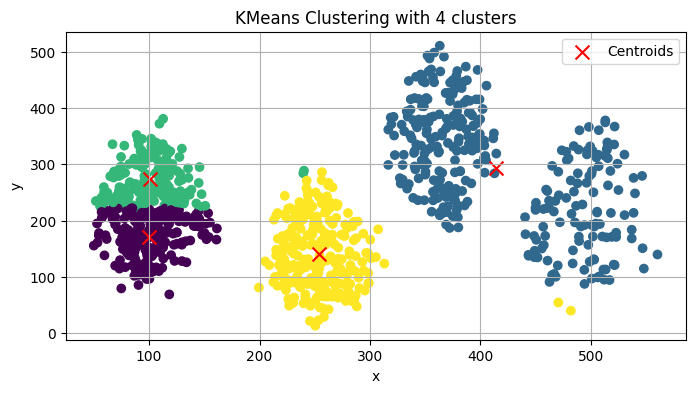

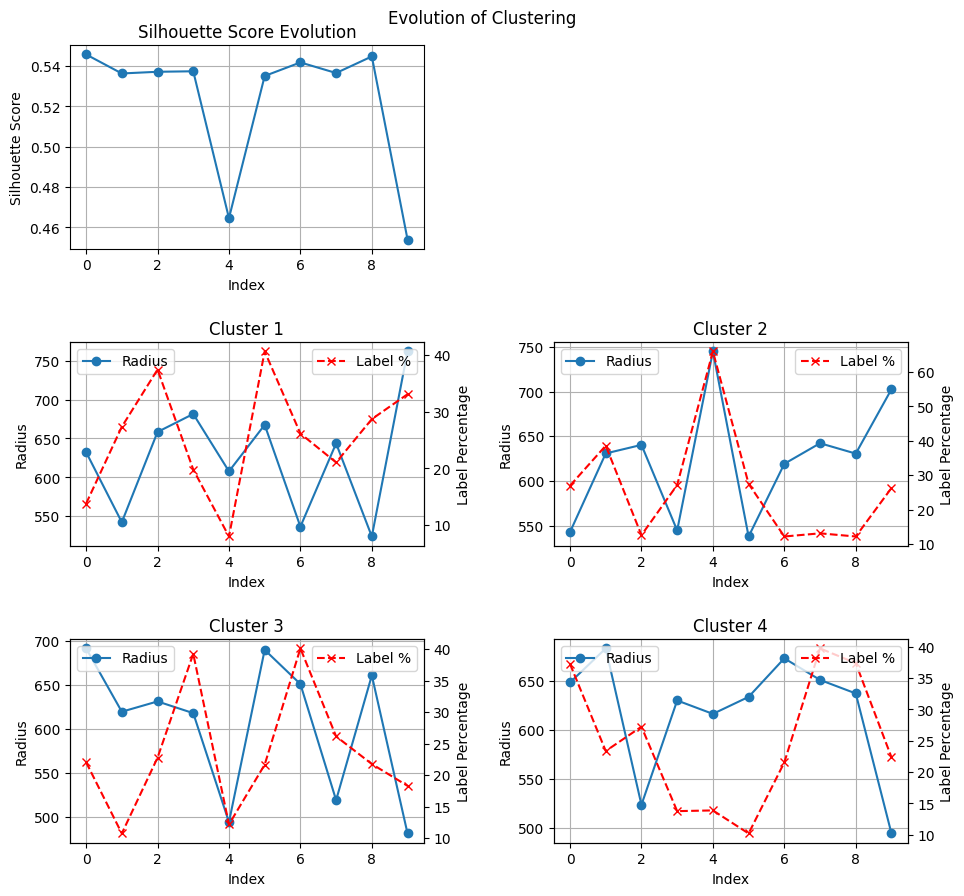

In [118]:
Xs = np.array_split(X, 10)
mv.clustering_evolution(Xs, 4)